In [2]:
import sys
import os
import time

# Add the project root directory to sys.path (go up 1 level from notebooks/)
# Use os.getcwd() and navigate up since __file__ is not available in notebooks
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    # Navigate up to discrete-gflownet project root (just 1 level up)
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
else:
    # Already in project root or somewhere else
    project_root = current_dir

if project_root not in sys.path:
    sys.path.append(project_root) 
print(f"Project root: {project_root}")

from reward_func.evo_devo import coord_reward_func, oscillator_reward_func

test_state = (50, -53, -57, 8, 9, -6, -117, 81, 8)
start_time = time.perf_counter_ns()
test_reward = coord_reward_func(test_state)
end_time = time.perf_counter_ns()
print(f"Time taken to run coord_reward_func: {(end_time - start_time)/1e9:.9f} seconds")
print(f"Test reward for state {test_state}: {test_reward}")
    

Project root: /Users/dannyhuang/Developer/gflownet2/discrete-gflownet
Time taken to run coord_reward_func: 0.000028458 seconds
Test reward for state (50, -53, -57, 8, 9, -6, -117, 81, 8): 4


In [3]:
# Import plotting function from graph module
from graph.graph import draw_network_motif
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import numpy as np
import time
from reward_func.evo_devo import somitogenesis_reward_func, somitogenesis_sol_func, weights_to_matrix, somitogenesis_sparsity_reward_func

In [4]:
test_state=[0, 0, 0, 0, 0, 100] # g(i,t)
# test_state= [0, 0, -100, 0, 0, 0, -100, -80, 0, 100, 100, 100] # 3n Repressilator 
# test_state=[70, 50, 10, -30,30, 20] # 2n somite-half
# test_state= [85, 50, 10, -80, 40, 20] # 2n somite-s
# test_state= [100, 0, 40, -100, 30, 20] # 2n somite-s
# test_state= [0, 90, 0, 50, 30, 20]  # 2n somite-1
# test_state=[100, 100, -60, 50, -75, 30] # 2n chaos

# test_state=[37, -89, 88, 89, 76, 51, -56, 43, -57, 35, 1, -16, 36, 7, -53, 6, 0, 0, 31, 0, 32, 0, -51, 0, 31, 6, 56, 1, -50, -2, 1, -32, 1, -30, -5, 0, 80, -100, 58, 75, -50, -50, 0, -30, -75, 76, 100, -26, -5, -39, -18, -36, -25, 51, -61, 1]
# test_state=[37, -89, 88, 89, 76, 51, -56, 43, -57, 35, 1, -16, 36, 7, -53, 6, -36, 26, 31, 56, 32, -55, -51, 10, 31, 6, 56, 1, -50, -2, 1, -32, 1, -30, -5, 5, 80, -100, 58, 75, -50, -50, 0, -30, -75, 76, 100, -26, -5, -39, -18, -36, -25, 51, -61, 1]

# test_state=[160, -50, -110, 105, 5, 0, 50, 50, -5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -105, 150, 0, 0, 0, 0, 0]


# test_state=[165, -120, -75, 175, 155, -185, 200, -180, 120, -110, 20, -105, -15, -55, 200, 160, 5, -15, -10, 160, 105, 55, 100, -145, 155, -150, -155, 55, 55, 5, -5, 10, -100, 0, 10, 50, -50, 50, 5, -5, -5, 50, 10, 50, 50, 0, 0, -50, 5, -200, 175, 125, -130, -50, 50, -5]
# test_state=[165, -120, -75, 175, 155, -185, 200, -165, 120, -110, 20, -105, -15, -55, 200, 160, 5, -15, -10, 160, 105, 55, 100, -150, 155, -150, -155, 55, 55, 5, -5, 10, -100, 0, 10, 50, -50, 50, 5, -5, -5, 50, 10, 50, 50, 0, 0, -50, 5, -200, 175, 125, -130, -50, 50, -5]
# test_state=[149.00, -120.00, -75.00, 182.00, 155.00, -185.00, 111.00, -165.00, 120.00, -110.00, 20.00, 0.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, 0.00, 160.00, 105.00, 55.00, 100.00, -150.00, 155.00, -150.00, -155.00, 0.00, 55.00, 5.00, -5.00, 10.00, -100.00, 0.00, 10.00, 50.00, -50.00, 50.00, 0.00, -5.00, -5.00, 50.00, 10.00, 50.00, 50.00, 0.00, 0.00, -50.00, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[152.00, -120.00, -75.00, 181.00, 155.00, -185.00, 112.00, -180.00, 120.00, -110.00, 20.00, 0.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, 0.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -150.00, -155.00, 0.00, 55.00, 5.00, -5.00, 10.00, -100.00, 0.00, 10.00, 50.00, -50.00, 50.00, 0.00, -5.00, -5.00, 50.00, 10.00, 50.00, 50.00, 0.00, 0.00, -50.00, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[150.68, -67.07, -73.95, 177.39, 113.62, -177.17, 110.91, -130.48, 49.06, 0.00, 17.48, 0.00, 15.03, 0.00, 132.08, 192.22, 0.00, -17.00, -0.00, 166.29, 44.44, -0.00, 40.05, -73.53, 103.50, -0.00, -137.98, 0.00, 33.52, 0.00, -2.52, 0.00, -97.17, 0.00, 0.00, 0.00, 0.00, 35.70, 0.00, -0.00, -0.00, 27.49, -0.00, 33.45, 0.00, -0.00, -10.37, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[151.31, -75.88, -75.79, 178.77, 122.55, -178.40, 111.41, -140.35, 53.12, 0.00, 18.62, 0.00, 13.94, 0.00, 132.75, 186.66, 0.00, -18.13, -0.00, 168.05, 55.55, -0.00, 52.07, -75.44, 107.38, -0.00, -138.79, 0.00, 35.43, 0.00, -4.82, 0.00, -95.49, 0.00, -0.00, 0.00, 0.00, 36.21, 0.00, -0.22, -0.00, 26.96, -0.00, 34.85, 0.00, -0.00, -8.85, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[152.30, -90.31, -78.83, 181.03, 137.22, -180.42, 112.23, -156.53, 59.79, 0.00, 20.49, -0.00, 12.14, 0.00, 133.86, 177.52, 0.00, -19.97, -0.00, 170.93, 73.75, -0.00, 71.79, -78.56, 113.75, -0.00, -140.11, 0.00, 38.57, 0.00, -8.59, 0.00, -92.76, 0.00, -0.00, 0.00, 0.00, 37.54, 0.00, -3.35, -0.00, 30.73, -0.00, 32.11, 0.00, -0.00, -6.36, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[157.72, -101.89, -78.35, 178.57, 149.73, -182.13, 156.96, -170.33, 71.85, -0.00, 22.08, -50.82, 10.61, -0.00, 134.80, 169.71, 2.88, -21.23, -0.00, 170.19, 86.37, 3.33, 88.59, -88.01, 119.18, -48.51, -146.92, 0.00, 51.55, 0.00, -16.21, 0.00, -84.93, 0.00, -5.83, 9.78, -0.00, 38.66, 0.00, -6.02, -10.07, 33.94, 0.00, 29.78, 0.00, 0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[151.59, -104.08, -75.55, 179.45, 152.77, -182.55, 111.67, -173.68, 79.84, -20.03, 26.11, 0.00, 6.75, -0.00, 152.00, 167.81, 3.70, -18.67, -0.00, 166.03, 86.42, 24.45, 92.68, -111.31, 118.71, -87.89, -149.74, 0.00, 53.63, 3.06, -12.49, 0.00, -88.70, 22.90, -0.85, 26.43, -16.00, 43.15, 0.00, -6.94, -20.67, 39.14, 0.00, 36.12, 0.00, -0.00, -0.00, -7.26, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[151.59, -99.61, -80.79, 179.45, 152.77, -182.55, 111.67, -173.68, 64.09, -20.03, 26.11, 0.00, 6.75, -0.00, 152.00, 167.81, 3.70, -18.67, -0.00, 166.03, 85.48, 24.45, 92.68, -111.31, 118.71, -87.89, -149.74, 0.00, 53.63, 0.00, -12.49, 0.00, -88.70, 22.90, -0.85, 26.43, -16.00, 43.15, 0.00, -6.94, -0.00, 39.14, 0.00, 36.12, 0.00, -0.00, -0.00, -7.26, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[151.59, -103.92, -76.07, 179.45, 152.77, -182.55, 111.67, -173.68, 78.94, -20.03, 26.11, 0.00, 6.75, -0.00, 152.00, 167.81, 3.70, -18.67, -0.00, 166.03, 87.10, 24.45, 92.68, -111.31, 118.71, -87.89, -149.74, 0.00, 53.63, 0.00, -12.49, 0.00, -88.70, 22.90, -0.85, 26.43, -16.00, 43.15, 0.00, -6.94, -19.35, 39.14, 0.00, 36.12, 0.00, -0.00, -0.00, -7.26, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]



# test_state=[165.00, -120.00, -75.00, 175.00, 155.00, -185.00, 200.00, -180.00, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -150.00, -155.00, 55.00, 55.00, 5.00, -5.00, 10.00, -100.00, -0.00, 10.00, 50.00, -50.00, 50.00, 5.00, -5.00, -5.00, 50.00, 10.00, 50.00, 50.00, -0.00, -0.00, -50.00, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00] 
# test_state=[164.80, -120.00, -75.00, 175.63, 155.00, -185.00, 197.01, -180.00, 120.00, -110.00, 20.00, -100.17, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -9.87, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -150.00, -155.00, 50.54, 55.00, 5.00, -5.00, 10.00, -100.00, -0.00, 10.00, 50.00, -46.65, 49.33, 3.16, -5.20, -5.00, 49.03, 10.00, 48.53, 50.00, -0.00, -0.00, -45.75, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 155.00, -185.00, 200.00, -180.00, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -150.00, -155.00, 55.00, 55.00, 5.00, -5.00, 10.00, -100.00, -0.00, 10.00, 50.00, 0.00, 37.37, 5.00, 0.00, -5.00, 30.25, 10.00, 32.46, 50.00, -0.00, -0.00, -0.00, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 155.00, -185.00, 200.00, -180.00, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -150.00, -155.00, 55.00, 55.00, 5.00, -5.00, 10.00, -100.00, -0.00, 10.00, 50.00, 0.00, 35.93, 5.00, -0.00, -5.00, 27.06, 10.00, 34.32, 50.00, -0.00, -0.00, -0.00, 5.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 155.00, -185.00, 200.00, -180.00, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -87.89, -149.74, 55.00, 53.63, 5.00, -12.49, 10.00, -88.70, -0.00, -0.85, 50.00, 0.00, 35.93, 5.00, -0.00, -5.00, 27.06, 10.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 155.00, -185.00, 200.00, -180.00, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 160.00, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 100.00, -145.00, 155.00, -97.90, -150.55, 55.00, 54.47, 5.00, -11.91, 10.00, -89.27, -0.00, -0.00, 50.00, 0.00, 35.93, 5.00, -0.00, -5.00, 27.06, 10.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 152.77, -182.55, 200.00, -173.68, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 167.81, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 92.68, -145.00, 155.00, -94.91, -150.25, 55.00, 54.03, 5.00, -11.85, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 5.00, -0.00, -5.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[165.00, -120.00, -75.00, 175.00, 154.94, -182.85, 200.00, -176.08, 120.00, -110.00, 20.00, -105.00, -15.00, -55.00, 200.00, 166.46, 5.00, -15.00, -10.00, 160.00, 105.00, 55.00, 95.60, -145.00, 155.00, -94.91, -150.25, 55.00, 54.03, 5.00, -11.85, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 5.00, -0.00, -5.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[150.68, -120.00, -75.00, 177.39, 154.94, -182.85, 110.91, -176.08, 120.00, -110.00, 20.00, 0.00, -15.00, -55.00, 200.00, 166.46, 5.00, -15.00, -0.00, 160.00, 105.00, 55.00, 95.60, -145.00, 155.00, -94.91, -150.25, 0.00, 54.03, 5.00, -11.85, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 0.00, -0.00, -5.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]  
# remove smalls
# test_state=[150.68, -120.00, -75.00, 177.39, 154.94, -182.85, 110.91, -176.08, 120.00, -110.00, 20.00, 0.00, -15.00, -55.00, 200.00, 166.46, 0.00, -15.00, -0.00, 160.00, 105.00, 55.00, 95.60, -145.00, 155.00, -94.91, -150.25, 0.00, 54.03, 0.00, 0.00, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 0.00, -0.00, 0.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, 0.00]  



# new
# test_state=[160.63, -120.00, -75.00, 176.44, 154.94, -182.85, 181.73, -176.08, 120.00, -110.00, 20.00, -79.18, -15.00, -55.00, 200.00, 166.46, 5.00, -15.00, -0.00, 160.00, 105.00, 55.00, 95.60, -145.00, 155.00, -94.91, -150.25, 40, 54.03, 5.00, -11.85, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 0.00, -0.00, -5.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]
# test_state=[161.24, -120.00, -75.00, 175.79, 154.94, -182.85, 184.75, -176.08, 120.00, -110.00, 20.00, -82.81, -15.00, -55.00, 200.00, 166.46, 5.00, -15.00, -0.00, 160.00, 105.00, 55.00, 95.60, -145.00, 155.00, -94.91, -150.25, 55.00, 54.03, 5.00, -11.85, 0.00, -89.34, -0.00, -0.00, 50.00, 0.00, 35.93, 0.17, -0.00, -5.00, 27.06, 0.00, 34.32, 50.00, -0.00, -0.00, -0.00, -0.00, -200.00, 175.00, 125.00, -130.00, -50.00, 50.00, -5.00]








# Calculate number of nodes from the length of state vector
n_nodes = int((-1 + (1 + 4*len(test_state))**0.5) / 2)  # solve quadratic: n^2 + n - len(state) = 0
n_weights = n_nodes * n_nodes

W = weights_to_matrix(test_state[:n_weights])
print(W)

from ipywidgets import VBox, HBox, interactive_output, Label


def update_plot(cell_pos, **kwargs):
    params = list(kwargs.values())
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(7, 24)) 
    
    # Plot somite pattern and get reward
    start_time = time.perf_counter_ns()
    reward = somitogenesis_sparsity_reward_func(params, plot=True, ax=ax1)
    end_time = time.perf_counter_ns()
    print(f"Reward for somitogenesis: {reward}")
    print(f"Time taken to run somitogenesis_reward_func: {(end_time - start_time)/1e9:.9f} seconds")
    
    # Plot oscillation diagram for selected cell_pos
    t_sim, cell_trajectory, _ = somitogenesis_sol_func(params, cell_position=cell_pos)
    for i in range(n_nodes):
        ax2.plot(t_sim, cell_trajectory[:, i], label=f'Gene {i+1}', linewidth=2)        
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Gene Concentration')
    ax2.set_title(f'Gene Expression Dynamics - Cell {cell_pos}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot weighted sum for first row in separate subplot
    weights = params[:n_weights]
    W = weights_to_matrix(weights)
    w_first_row = W[0, :]  # First row of weight matrix
    y_t = cell_trajectory @ w_first_row  # Weighted sum: w11*x1 + w12*x2 + w13*x3 + ...
    ax3.plot(t_sim, y_t, label=f'Weighted Sum (Row 1)', linewidth=3, linestyle='--', color='red')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Weighted Sum')
    ax3.set_title(f'Weighted Sum: y(t) = w₁₁x₁(t) + w₁₂x₂(t) + ... - Cell {cell_pos}')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Draw network motif in last subplot
    draw_network_motif(params, ax=ax4)
    ax4.set_title(f"{n_nodes}-Node Network Motif")
    
    plt.tight_layout()
    plt.show()


# Create sliders for all parameters
sliders = {
    'cell_pos': IntSlider(min=0, max=99, step=1, value=6, description='Cell Position')
}
# Weight sliders
for i in range(n_weights):
    default_value = test_state[i] if i < len(test_state) else 0
    sliders[f'w{i+1}'] = FloatSlider(min=-10000, max=10000, step=1, value=default_value, description=f'w{i+1}')
# D value sliders    
for i in range(n_nodes):
    default_value = test_state[n_weights+i] if n_weights+i < len(test_state) else 0
    sliders[f'd{i+1}'] = FloatSlider(min=-10000, max=10000, step=1, value=default_value, description=f'd{i+1}')
# Arrange sliders vertically
slider_widgets = [sliders['cell_pos']]
# Add a label for weights
slider_widgets.append(Label(value="Weights:"))
for i in range(n_weights):
    slider_widgets.append(sliders[f'w{i+1}'])
# Add a label for d values
slider_widgets.append(Label(value="D values:"))
for i in range(n_nodes):
    slider_widgets.append(sliders[f'd{i+1}'])



controls_box = VBox(slider_widgets)
out = interactive_output(update_plot, sliders)
# Arrange plot (output) on the left, sliders on the right
display(HBox([out, controls_box]))



[[0 0]
 [0 0]]



Testing all genes heatmap (3x3 grid):
Total boundaries across 3 timepoints: 0
Sparsity factor: 1.0
Total boundaries across 3 timepoints: 0
Sparsity factor: 1.0


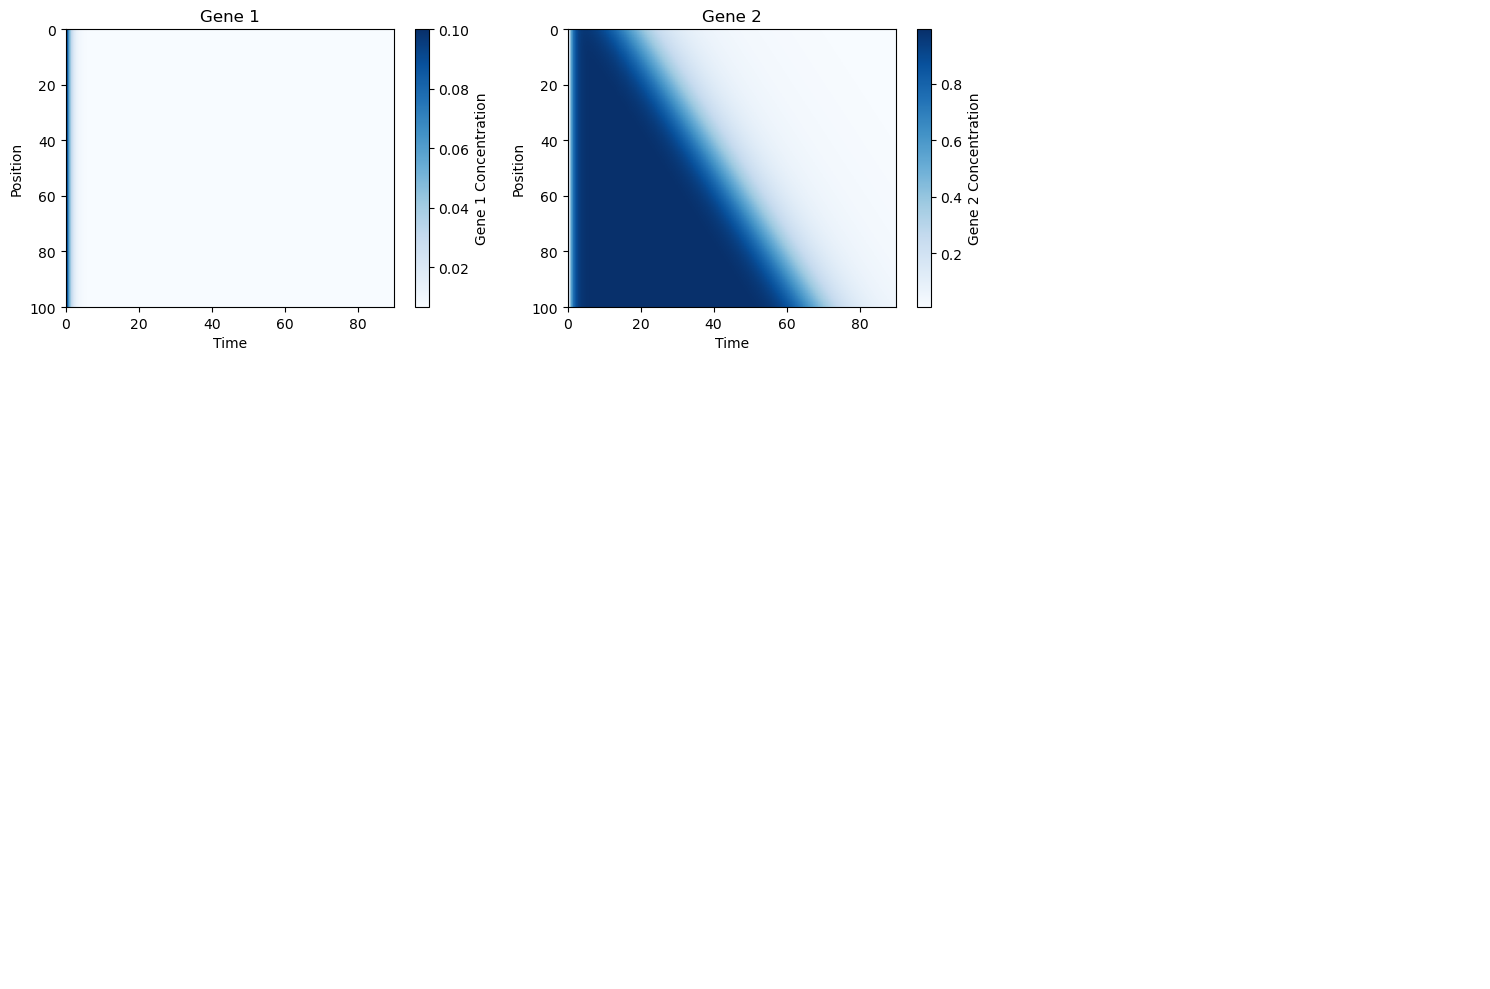

In [5]:
# Test the new gene selection functionality
test_params = test_state[:] 

# Test plotting all genes in a 3x3 grid (empty if not fit)
print("\nTesting all genes heatmap (3x3 grid):")
n_genes = n_nodes
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Plot each gene in its subplot, leave extra subplots empty
for i in range(n_rows * n_cols):
    if i < n_genes:
        somitogenesis_sparsity_reward_func(
            test_params, plot=True, ax=axes[i], gene_idx=i, plot_all_genes=False
        )
        axes[i].set_title(f"Gene {i+1}")
    else:
        axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
"""Plot network motifs and their corresponding somite patterns"""
# from graph.graph import plot_network_motifs_and_somites

# # Define test weights to visualize
# test_weights_list = [
#     # (65, -110, 52, -40, 32, -8, -65, -32, 71),
#     [-5, 200, -6, -51, -26, 5, 5, 1, -125, 25, 30, 100, 0, 60, -5, -25, -1, 5, 0, -75, 30, 0, -1, -200, -25],
#     [60, 32, -38, -85, 70, -63, 22, -27, -7],
#     [60, 32, -38, -85, 70, -63, 22, -27, -7, 0, 0, 0, 0, 0, 0, 0]
# ]

# # Plot network motifs and their corresponding somite patterns
# save_path = plot_network_motifs_and_somites(test_weights_list)
# print(f"Plot saved to: {save_path}")



In [ ]:
"""Plot kymograph of g(i,t) function from somitogenesis reward function"""
# import numpy as np
# import matplotlib.pyplot as plt

# # Parameters from somitogenesis_reward_func
# N_CELLS = 100
# N_SIMTIME = 90 
# N_TIMEPOINTS = 200
# A, B = 0.1/5, 0.2/5

# # Create position and time arrays
# positions = np.arange(N_CELLS).reshape(-1, 1)
# t = np.linspace(0, N_SIMTIME, N_TIMEPOINTS)

# # Calculate g(i,t) for all positions and times
# g_values = np.zeros((N_TIMEPOINTS, N_CELLS))
# for i, time in enumerate(t):
#     g = np.minimum(np.exp(A * positions - B * time), 1)
#     g_values[i] = g.flatten()

# # Plot kymograph
# plt.figure(figsize=(10, 6))
# plt.imshow(g_values.T, aspect='auto', cmap='Blues', 
#           extent=[0, N_SIMTIME, N_CELLS, 0])
# plt.colorbar(label='g(i,t)')
# plt.xlabel('Time')
# plt.ylabel('Position')
# plt.title('Kymograph of g(i,t) = min(exp(A*i - B*t), 1)')
# plt.show()

# # Print parameter values used
# print(f"Parameters used:")
# print(f"A = {A:.6f}")
# print(f"B = {B:.6f}")
# print(f"N_CELLS = {N_CELLS}")
# print(f"N_SIMTIME = {N_SIMTIME}")
# print(f"N_TIMEPOINTS = {N_TIMEPOINTS}")


In [ ]:
"""Test cases for Masking in GridEnv"""
# import sys
# import os
# import numpy as np
# from types import SimpleNamespace

# # Add the project root directory to sys.path
# current_dir = os.getcwd()
# if 'notebooks' in current_dir:
#     project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
# else:
#     project_root = current_dir

# if project_root not in sys.path:
#     sys.path.append(project_root)

# from disc_gflownet.envs.grid_env import GridEnv

# # Create a simple test environment with 3 nodes (12 dimensions: 9 weights + 3 diagonals)
# args = SimpleNamespace(
#     n_workers=1,
#     cache_max_size=1000,
#     min_reward=0.001,
#     custom_reward_fn=lambda x: 0,  # Dummy reward function
#     n_steps=20,
#     n_dims=4**2+4,
#     max_nodes=4,
#     max_edges=2,
#     actions_per_dim={'weight': [5, 25, -5, -25], 'diagonal': [5, 25, -5, -25]},
#     grid_bound={'weight': {'min': -100, 'max': 100}, 'diagonal': {'min': -100, 'max': 100}},
#     enable_time=False,
#     consistent_signs=True
# )

# env = GridEnv(args)

# # Print all actions first
# env.print_actions()


# print(f"Environment has {env.n_nodes} nodes, {env.n_dims} dimensions")
# print(f"Action space size: {env.action_dim}")

# print("\nTesting Masking in GridEnv")
# print("==========================")

# # s0
# env.reset()
# print(f"Steps Total: {env._step}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # First action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s1
# print(f"Steps Total: {env._step}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Second action
# action = allowed_indices[3]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s2
# print(f"Steps Total: {env._step}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 


In [ ]:
"""Test cases for Progressive Masking in GridEnv2"""
# import sys
# import os
# import numpy as np
# from types import SimpleNamespace

# # Add the project root directory to sys.path
# current_dir = os.getcwd()
# if 'notebooks' in current_dir:
#     project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
# else:
#     project_root = current_dir

# if project_root not in sys.path:
#     sys.path.append(project_root)

# from disc_gflownet.envs.grid_env2 import GridEnv2

# # Create a simple test environment with 3 nodes (12 dimensions: 9 weights + 3 diagonals)
# args = SimpleNamespace(
#     n_workers=1,
#     cache_max_size=1000,
#     min_reward=0.001,
#     custom_reward_fn=lambda x: 0,  # Dummy reward function
#     actions_per_dim={'weight': [1, 5, 25, -1, -5, -25], 'diagonal': [1, 5, -1, -5]},
#     grid_bound={'weight': {'min': -200, 'max': 200}, 'diagonal': {'min': -20, 'max': 20}},
#     enable_time=False,
#     consistent_signs=True,
#     n_dims=3**2+3,  # 9 weights + 3 diagonals
#     n_steps=2+6+10,  # Total steps for all network sizes
#     steps_per_network={1:2, 2:6, 3:10}  # Steps per network size
# )

# env = GridEnv2(args)

# # Print all actions first
# env.print_actions()

# print("Testing Progressive Masking in GridEnv2")
# print(f"Environment has {env.n_nodes} nodes, {env.n_dims} dimensions")
# print(f"Action space size: {env.action_dim}")


# # s0
# env.reset()
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # First action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s1
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Second action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s2
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Third action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s3
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Fourth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s4
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Fifth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s5
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Sixth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s6
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Seventh action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s7
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Eighth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s8
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Ninth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s9
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 

# # Tenth action
# action = allowed_indices[0]
# next_state, reward, done = env.step(action)
# print("\nTaking action:", action)
# print(f"New state: {env._state}")
# print(f"Done: {done}")

# # s10
# print(f"Current network size: {env.current_network_size}") 
# print(f"Steps Total: {env._step}")
# print(f"_step in current network: {env._step_in_current_network}")
# mask = env.get_forward_mask(env._state)
# print(f"Number of allowed actions: {np.sum(mask)}")
# allowed_indices = np.where(mask)[0]
# print(f"Allowed action indices: {allowed_indices}")
# print(f"--------\n") 


In [ ]:
"""test combined sparsity reward"""

import numpy as np
def sparsity_reward_combined(state, w1=0.0, w2=1.0):
    # Entropy-based component
    # Normalize values to probabilities
    abs_values = np.abs(state)
    if sum(abs_values) == 0:
        entropy_reward = 1.0  # maximum sparsity
    else:
        probs = abs_values / sum(abs_values)
        # Calculate entropy (lower entropy = more sparse)
        entropy = -sum(p * np.log(p) for p in probs if p > 0)
        entropy_reward = 1 / (1 + entropy)  # transform to reward
    
    # L0 component (explicitly rewards zeros)
    n_zeros = sum(1 for x in state if x == 0)
    l0_reward = n_zeros / len(state)
    
    return w1 * entropy_reward + w2 * l0_reward

# Example states to test
sparse_state1 = (10, 1, 1, 1, 10, 1, 1, 1, 10)
# sparse_state1 = (10, 0, 0, 0, 10, 0, 0, 0, 10)
sparse_state2 = (0, 0, 0, 0, 0, 0, 0, 0, 0)


SPARSITY_WEIGHT = 5.0
sparsity_factor1 = round(1.0 + (SPARSITY_WEIGHT * sparsity_reward_combined(sparse_state1)), 3)
sparsity_factor2 = round(1.0 + (SPARSITY_WEIGHT * sparsity_reward_combined(sparse_state2)), 3)


# Test combined reward function
print(f"Combined sparsity reward for sparse_state1: { sparsity_factor1 }")
print(f"Combined sparsity reward for sparse_state2: { sparsity_factor2 }")

In [ ]:
"""Sigmoid activation function with overflow protection"""

def sigmoid(z):
    return 1 / (1 + np.exp( - np.clip(z, -500, 500)))

# Test the sigmoid function with a simple differential equation
# dx₁/dt = σ(d₁g(t) + w₁₁x₁ + w₁₂x₂ + w₁₃x₃) - s₁x₁

def test_equation(x1, x2, x3, d1, w11, w12, w13, s1, g_value=1.0):
    """Calculate the right side of the differential equation for x1"""
    z = d1 * g_value + w11 * x1 + w12 * x2 + w13 * x3
    return sigmoid(z) - s1 * x1

# Create interactive sliders to test the equation
def update_equation(**kwargs):
    x1 = kwargs['x1']
    x2 = kwargs['x2']
    x3 = kwargs['x3']
    d1 = kwargs['d1']
    w11 = kwargs['w11']
    w12 = kwargs['w12']
    w13 = kwargs['w13']
    s1 = kwargs['s1']
    g_value = kwargs['g']
    
    z = d1 * g_value + w11 * x1 + w12 * x2 + w13 * x3
    # z= 0
    sigmoid_z = sigmoid(z)
    dx1dt = sigmoid_z - s1 * x1
    
    print(f"z = {z:.4f}")
    print(f"σ(z) = {sigmoid_z:.4f}")
    # print(f"dx₁/dt = {dx1dt:.4f}")
    
    return sigmoid_z

# Create sliders for all parameters
equation_sliders = {
    'x1': FloatSlider(min=0, max=1, step=0.1, value=0.5, description='x₁'),
    'x2': FloatSlider(min=0, max=1, step=0.1, value=0.5, description='x₂'),
    'x3': FloatSlider(min=0, max=1, step=0.1, value=0.5, description='x₃'),
    'd1': FloatSlider(min=-10, max=10, step=0.5, value=1.0, description='d₁'),
    'w11': FloatSlider(min=-10, max=10, step=0.5, value=0.0, description='w₁₁'),
    'w12': FloatSlider(min=-10, max=10, step=0.5, value=0.0, description='w₁₂'),
    'w13': FloatSlider(min=-10, max=100, step=0.5, value=0.0, description='w₁₃'),
    's1': FloatSlider(min=0, max=2, step=0.1, value=1.0, description='s₁'),
    'g': FloatSlider(min=0, max=1, step=0.1, value=1.0, description='g(t)')
}


interact(update_equation, **equation_sliders)

In [ ]:
# Simple test to understand how @ W.T works with a 2-node system
n_nodes = 2

# Create a simple 2x2 weight matrix
W = np.array([
    [1, 4],
    [3, 2]
])
print("W:\n", W)
print("W.T:\n", W.T)

# Create a simple x array with 3 cells, 2 nodes each
x = np.array([2, 3])  # Flattened array

# # Reshape to (3 cells, 2 nodes)
x_reshaped = x.reshape(-1, 2)
print("x_reshaped:\n", x_reshaped)

# # Calculate x_reshaped @ W.T
result = x_reshaped @ W.T
print("x_reshaped @ W.T:\n", result)

# Alternative way using W @ x_reshaped.T
result_alt = (W @ x_reshaped.T)
print("\nAlternative calculation:")
print("(W @ x_reshaped.T).T:\n", result_alt)

In [ ]:
state = [70, 100, -80, 100, -75, 30]
int((-1 + (1 + 4*(6) )**0.5) / 2)